# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

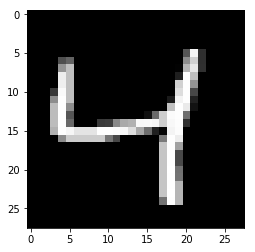

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [49]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
pixel_count = 784

inputs_ = tf.placeholder(tf.float32, [None, pixel_count])
targets_ = tf.placeholder(tf.float32, [None, pixel_count])

# Output of hidden layer
encoded = tf.contrib.layers.fully_connected(inputs=inputs_, 
                                           num_outputs=encoding_dim)
# Output layer logits
logits = tf.contrib.layers.fully_connected(inputs=encoded, 
                                           num_outputs=pixel_count, 
                                           activation_fn=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss=cost)

## Training

In [50]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [51]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6900
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6782
Epoch: 1/20... Training loss: 0.6734
Epoch: 1/20... Training loss: 0.6670
Epoch: 1/20... Training loss: 0.6590
Epoch: 1/20... Training loss: 0.6495
Epoch: 1/20... Training loss: 0.6390
Epoch: 1/20... Training loss: 0.6262
Epoch: 1/20... Training loss: 0.6116
Epoch: 1/20... Training loss: 0.5962
Epoch: 1/20... Training loss: 0.5827
Epoch: 1/20... Training loss: 0.5683
Epoch: 1/20... Training loss: 0.5495
Epoch: 1/20... Training loss: 0.5307
Epoch: 1/20... Training loss: 0.5123
Epoch: 1/20... Training loss: 0.4948
Epoch: 1/20... Training loss: 0.4751
Epoch: 1/20... Training loss: 0.4541
Epoch: 1/20... Training loss: 0.4413
Epoch: 1/20... Training loss: 0.4284
Epoch: 1/20... Training loss: 0.4092
Epoch: 1/20... Training loss: 0.3948
Epoch: 1/20... Training loss: 0.3842
Epoch: 1/20... Training loss: 0.3690
E

Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1810
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1812
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1789
Epoch: 1/20... Training loss: 0.1828
E

Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1480
E

Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1295
E

Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1151
E

Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1198
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1106
E

Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1123
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1109
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1061
E

Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1030
E

Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.1055
E

Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0989
E

Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0999
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0995
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0884
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

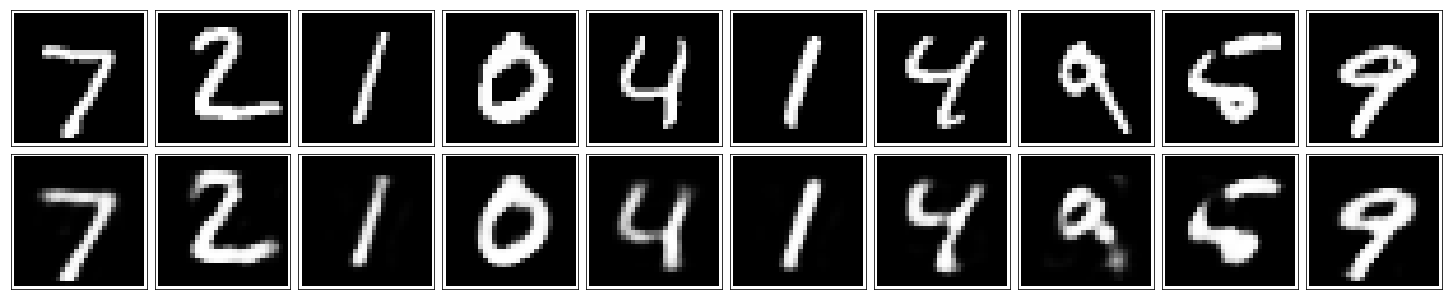

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.